In [117]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [118]:
# Carga del dataset Automobile

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",	"length", "width", "height", "curb_weight", "engine_type", "num_cylinders","engine_size", "fuel_system", "bore", "stroke", "compression_ratio","horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
# Cargar dataset con nombres de columnas
df = pd.read_csv(url, names=column_names, na_values="?")  # "?" indica valores faltantes
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


### Preprocesamiento de Datos
- Manejo de valores nulos.
- Conversión de variables categóricas en numéricas mediante one-hot encoding.
- Estandarización de variables numéricas.
- Eliminación de valores atípicos.
- MApa de correlacion y ver que columnas son redundantes o que no nos sirven

In [119]:
# Revisar la cantidad de valores nulos por columna
print("\nValores nulos por columna (antes del imputado):")
print(df.isnull().sum())


Valores nulos por columna (antes del imputado):
symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


In [120]:
# Eliminar todos los valores nulos del DataFrame
df = df.dropna()

# Verificar que se hayan eliminado los valores nulos
print("\nValores nulos por columna (después de eliminar los valores nulos):")
print(df.isnull().sum())


Valores nulos por columna (después de eliminar los valores nulos):
symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


In [121]:
numeric_cols = [
    "normalized_losses", "wheel_base", "length", "width", "height", "curb_weight",
    "engine_size", "bore", "stroke", "compression_ratio", "horsepower",
    "peak_rpm", "city_mpg", "highway_mpg", "price"
]

# Convertir las columnas numéricas a tipo float (si aún no lo están)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Las columnas restantes se consideran categóricas
categorical_cols = [col for col in df.columns if col not in numeric_cols]

/tmp/ipykernel_10463/2421709399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [122]:
# Conversión de variables categóricas en numéricas (One-Hot Encoding)
# Aplicamos get_dummies a las columnas categóricas.
# Se utiliza drop_first=True para evitar la trampa de variables ficticias (dummy variable trap).
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nColumnas del dataset después de One-Hot Encoding:")
print(df_encoded.columns)


Columnas del dataset después de One-Hot Encoding:
Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mitsubishi',
       'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel_type_gas', 'aspiration_turbo', 'num_doors_two',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_fwd', 'drive_wheels_rwd',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'num_cylinders_five', 'num_cylinders_four',
       'num_cylinder

In [123]:
df_encoded

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,engine_type_ohcv,num_cylinders_five,num_cylinders_four,num_cylinders_six,num_cylinders_three,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,True,False,False,False,False,False,True,False
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,True,False,False,False,False,False,False,True,False
6,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,...,False,True,False,False,False,False,False,False,True,False
8,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,...,False,True,False,False,False,False,False,False,True,False
10,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,True,False,False,False,False,False,True,False
201,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,True,False,False,False,False,False,True,False
202,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,True,False,False,True,False,False,False,False,True,False
203,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,True,False,False,True,False,False,False


In [125]:
# Especificamos las columnas numéricas a escalar (excluimos 'price')
scaler = StandardScaler()
cols_to_scale = [col for col in numeric_cols if col != "price"]
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

### Entrenamiento de Modelos


Evaluación del Modelo:
RMSE (Error Cuadrático Medio): 1714.50
R² (Coeficiente de Determinación): 0.8348


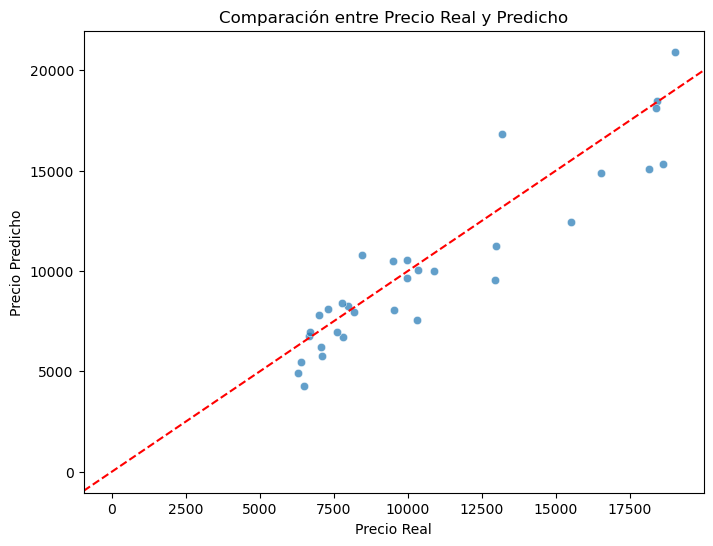

In [127]:
# 2. Definir variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=["price"])  # Eliminar la variable objetivo
y = df_encoded["price"]  # Variable a predecir

# 3. Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 5. Obtener predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# 6. Evaluar el modelo con RMSE y R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del Modelo:")
print(f"RMSE (Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

# 7. Visualizar predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real y Predicho")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Línea de referencia
plt.show()



Evaluación del Modelo:
RMSE (Error Cuadrático Medio): 1741.74
R² (Coeficiente de Determinación): 0.8295


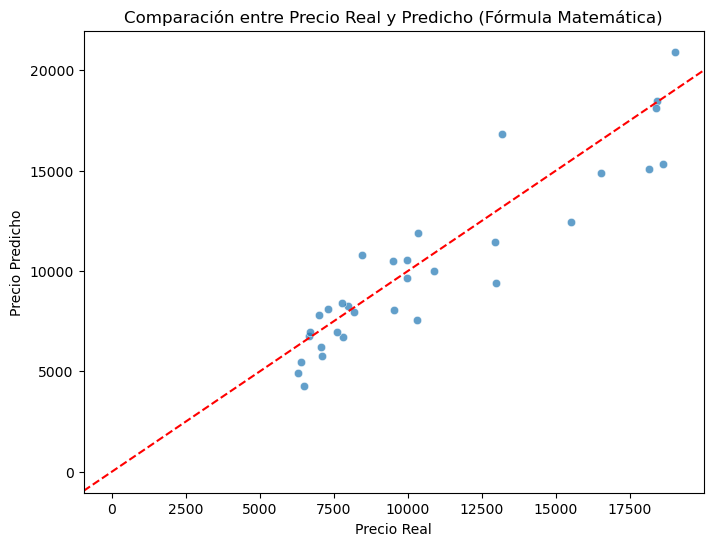

In [128]:
X = df_encoded.drop(columns=["price"]).values.astype(np.float64)  # Convertir a numpy array de tipo float64
y = df_encoded["price"].values.reshape(-1, 1).astype(np.float64)  # Convertir a matriz columna de tipo float64

# 3. Agregar columna de unos para el término independiente (β0)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# 4. Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Calcular los coeficientes de regresión usando la ecuación OLS
beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train  # β = (X^T X)^-1 X^T Y

# 6. Hacer predicciones en el conjunto de prueba
y_pred = X_test @ beta  # Y = X * β

# 7. Evaluar el modelo con RMSE y R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del Modelo:")
print(f"RMSE (Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

# 8. Visualizar predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), alpha=0.7)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real y Predicho (Fórmula Matemática)")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Línea de referencia
plt.show()